In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage import filters
import cv2 as cv
from PIL import Image, ImageDraw
from math import sqrt
from sklearn.model_selection import train_test_split

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [140]:
box_kernel = np.array([[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]])


box_kernel2 = np.array([[0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9]])
              

# Gaussian kernel
gaussian_kernel = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])

In [141]:
def convol(image, kernel):


    # Select kernel here:
    kernel = kernel

    # Middle of the kernel
    offset = len(kernel) // 2

    # Create output image
    output_image = np.zeros(np.shape(image))
    # draw = ImageDraw.Draw(output_image)

    # Compute convolution between intensity and kernels
    for x in range(offset, input_image.width - offset):
        for y in range(offset, input_image.height - offset):
            acc = [0, 0, 0]
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn = x + a - offset
                    yn = y + b - offset
                    input_pixels=[]
                    pixel = input_pixels[xn, yn]
                    acc[0] += pixel[0] * kernel[a][b]
                    acc[1] += pixel[1] * kernel[a][b]
                    acc[2] += pixel[2] * kernel[a][b]

            draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

    
        
    
    return output_image

In [142]:
def load_az_dataset(datasetPath):
    # Initialize the list of data and labels
    
    data = []
    labels = []
    # Loop over the rows of the A-Z handwritten digit dataset
    for row in open(datasetPath):
        # Parse the label and image from the row
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        # Images are represented as single channel (grayscale) images that are 28x28=784 pixels
        # -- we need to take this flattened 784-d list of numbers and reshape them into a 28x28 matrix
        image = image.reshape((28, 28))
        # Update the list of data and labels
        data.append(image)
        labels.append(label)
    # Convert the data and labels to NumPy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    # Return a 2-tuple of the A-Z data and labels
    return data, labels

In [143]:
data, labels = load_az_dataset('a_z_handwritten_data.csv')
idx = np.random.permutation(len(data))
x,y = data[idx], labels[idx]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)

In [145]:
class_names = ['A', 'B', 'C', 'D', 'E',
               'F', 'G', 'H', 'I', 'J',
              'K', 'L', 'M', 'N', 'O', 'P',
              'Q', 'R', 'S', 'T', 'U', 'V',
              'W', 'X', 'Y', 'Z']

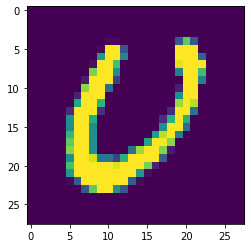

In [146]:
plt.imshow(X_test[0], interpolation='nearest')
plt.show()

In [147]:
y_test[0]

20

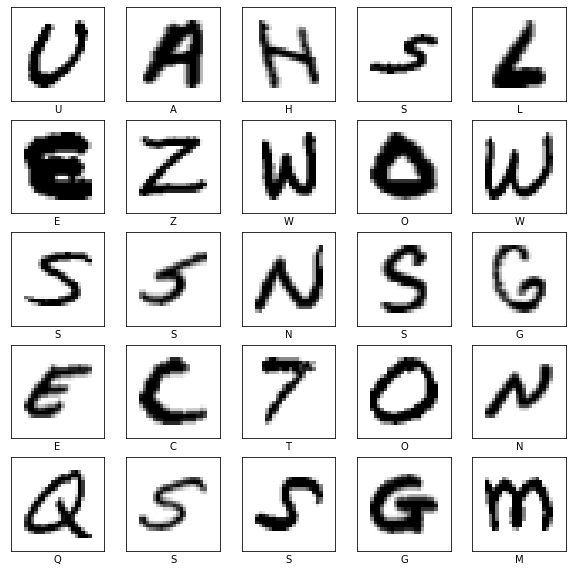

In [148]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [149]:
import tensorflow
import keras
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


In [150]:
X_train.shape

(249542, 28, 28)

In [151]:
X_test.shape

(122909, 28, 28)

In [152]:
X_train = X_train.reshape(249542, 28, 28, 1)
X_test = X_test.reshape(122909, 28, 28, 1)

In [153]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [154]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [155]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
7799/7799 [==============================] - 44s 6ms/step - loss: 0.2906 - accuracy: 0.9332 - val_loss: 0.1480 - val_accuracy: 0.9586
Epoch 2/10
7799/7799 [==============================] - 46s 6ms/step - loss: 0.1095 - accuracy: 0.9695 - val_loss: 0.0983 - val_accuracy: 0.9740
Epoch 3/10
7799/7799 [==============================] - 44s 6ms/step - loss: 0.0876 - accuracy: 0.9758 - val_loss: 0.1025 - val_accuracy: 0.9732
Epoch 4/10
7799/7799 [==============================] - 44s 6ms/step - loss: 0.0766 - accuracy: 0.9791 - val_loss: 0.1216 - val_accuracy: 0.9716


In [156]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.290612,0.933238,0.148003,0.958604
1,0.109481,0.969512,0.098307,0.973989
2,0.087595,0.975836,0.102539,0.973208
3,0.076634,0.979142,0.121583,0.971581


<AxesSubplot:>

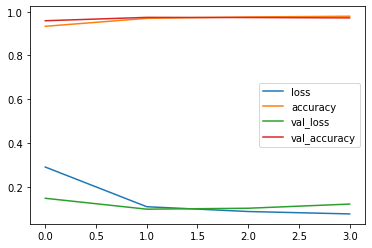

In [157]:
metrics.plot()

<AxesSubplot:>

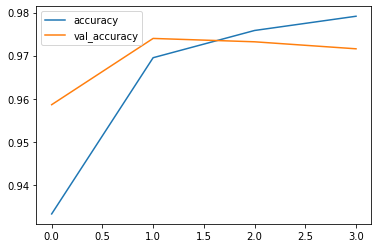

In [158]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

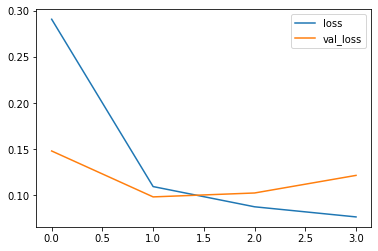

In [159]:
metrics[['loss','val_loss']].plot()

In [160]:
from sklearn.metrics import classification_report,confusion_matrix

In [161]:
predictions = model.predict_classes(X_test)

In [162]:
predictions2 = np.argmax(model.predict(X_test), axis=-1)

In [163]:
y_test.shape

(122909,)

In [164]:
y_test[0]

20

In [165]:
predictions[0]

20

In [166]:
print(classification_report(y_test,predictions))
# support = nb element de chaque classe
# recall = 
# f1-score = rapport entre faux positif et 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4566
           1       0.95      0.96      0.96      2848
           2       0.98      0.98      0.98      7706
           3       0.95      0.84      0.89      3356
           4       0.98      0.97      0.98      3687
           5       0.98      0.96      0.97       369
           6       0.93      0.95      0.94      1947
           7       0.97      0.88      0.92      2355
           8       0.89      0.98      0.93       373
           9       0.95      0.96      0.95      2785
          10       0.96      0.90      0.93      1774
          11       0.99      0.96      0.97      3873
          12       0.99      0.97      0.98      4113
          13       0.96      0.98      0.97      6212
          14       0.97      0.99      0.98     19188
          15       0.98      0.99      0.98      6450
          16       0.94      0.96      0.95      1937
          17       0.95    

In [167]:
confusion_matrix(y_test,predictions)

array([[ 4503,     7,     0,     3,     0,     0,     0,     2,     0,
            0,     0,     1,     6,     8,     3,     8,    10,    13,
            0,     1,     1,     0,     0,     0,     0,     0],
       [    2,  2745,     0,    15,     0,     0,     7,     1,     1,
            1,     5,     0,     1,     0,    33,     6,     7,    10,
           13,     0,     0,     0,     0,     0,     0,     1],
       [    1,     1,  7579,     0,    23,     0,    30,     0,     2,
            2,     0,    11,     2,     2,    20,     0,     2,    11,
            5,     0,     5,     0,     0,     1,     2,     7],
       [    5,     7,     0,  2823,     0,     0,     0,     0,     0,
           15,     0,     2,     0,     1,   446,    45,     1,     0,
            2,     2,     4,     0,     1,     0,     0,     2],
       [    2,    13,    26,     1,  3583,     7,    20,     0,     1,
            0,     1,     3,     2,     0,     2,     0,     0,     6,
            3,     2,     2,  

In [168]:
letter_to_predict = X_test[0]

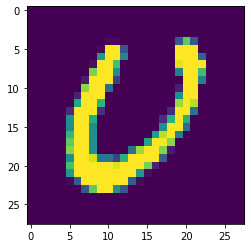

In [169]:
plt.imshow(letter_to_predict.reshape(28,28))

In [186]:
val = model.predict_classes(letter_to_predict.reshape(1,28,28,1))
class_names[val[0]]

'U'

In [187]:
letter_to_predict2 = X_test[77]
val = model.predict_classes(letter_to_predict2.reshape(1,28,28,1))
class_names[val[0]]

'N'

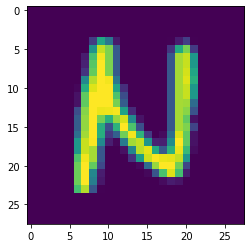

In [172]:
plt.imshow(X_test[77])

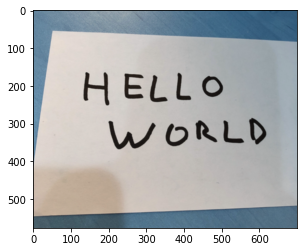

In [173]:
input_image = cv.imread("hello_world.png")
convolImage = cv.filter2D(input_image, -1, box_kernel)

plt.imshow(convolImage) 
plt.show()  

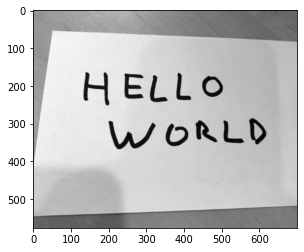

In [174]:
# cv.cvtcolor supprime la dimension couleur de l'image donc image est en noir et blanc
imgray = cv.cvtColor(convolImage, cv.COLOR_BGR2GRAY)

# plt rapplique une couleur de base, pour éviter cela -> cmap='gray'
plt.imshow(imgray, cmap='gray') 
plt.show() 

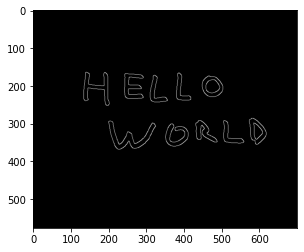

In [175]:
# cv.Canny permet d'appliquer des filtres sur l'image
edges = cv.Canny(imgray, 400, 255)

# findContour récupère les positions des coutours et les insère dans un tableau
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(edges,cmap='gray')
plt.show() 

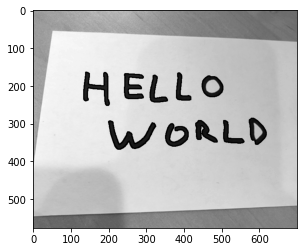

In [176]:
img = cv.drawContours(imgray, contours, -1, (0, 255,75), 2)
plt.imshow(img, cmap='gray')

In [177]:
array = []
ROI_number = 0
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ROI = img[y:y+h, x:x+w]
    #print(ROI.shape)
    array.append(np.array([cv.resize(ROI, (28,28))]))
    ROI_number += 1


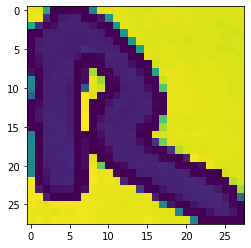

In [197]:
plt.imshow(array[3].reshape(28,28,1), interpolation='nearest')
plt.show()

In [198]:
val = model.predict_classes(array[3].reshape(1,28,28,1))
class_names[val[0]]

'U'

In [180]:
values = []
for elem in array: 
    values.append(model.predict_classes(elem.reshape(1,28,28,1)))
values

[array([20]),
 array([12]),
 array([11]),
 array([20]),
 array([2]),
 array([9]),
 array([11]),
 array([4]),
 array([11]),
 array([9])]

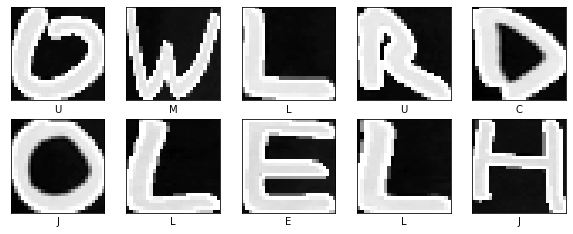

In [196]:
plt.figure(figsize=(10,10))

for i in range(10):
    value = model.predict_classes(array[i].reshape(1,28,28,1))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(array[i].reshape(28,28,1), cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(class_names[value[0]])
    #print(value[0])
    #print(class_names[value[0]])
    
plt.show()